In [1]:
pip install pandas matplotlib seaborn openpyxl

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime

# Set seaborn style for better visuals
sns.set(style="whitegrid")

# Airbnb Hotel Booking Analysis

## Introduction
Airbnb has revolutionized the hospitality industry by connecting travelers with unique accommodations worldwide. This analysis aims to uncover patterns, trends, and insights from the provided Airbnb dataset to assist hosts in maximizing earnings and improving guest experiences.

### Key Objectives:
- **Booking Patterns**: Identify peak booking seasons, location variations, and average booking lead times.
- **Pricing Strategies**: Examine effective pricing, seasonality impact, and pricing vs. guest satisfaction.
- **Guest Preferences**: Analyze desired amenities, preference variations, and factors for higher ratings.
- **Host Performance**: Evaluate high-performing hosts, responsiveness impact, and common complaints.

The dataset is from the Excel file "1730285881-Airbnb_Open_Data.xlsx". We'll load, clean, analyze, and visualize it.


In [5]:
# Load the data
# Upload the file to Colab first, or mount Google Drive: from google.colab import drive; drive.mount('/content/drive')
# Assuming uploaded to root:
file_path = '/content/1730285881-Airbnb_Open_Data.xlsx'  # Change if in Drive, e.g., '/content/drive/MyDrive/yourfile.xlsx'

df = pd.read_excel(file_path, engine='openpyxl')

# Display first few rows
df.head()

# Data overview
print(df.info())
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              102599 non-null  int64         
 1   NAME                            102329 non-null  object        
 2   host id                         102599 non-null  int64         
 3   host_identity_verified          102310 non-null  object        
 4   host name                       102191 non-null  object        
 5   neighbourhood group             102570 non-null  object        
 6   neighbourhood                   102583 non-null  object        
 7   lat                             102591 non-null  float64       
 8   long                            102591 non-null  float64       
 9   country                         102067 non-null  object        
 10  country code                    102468 non-null  object 

## Data Cleaning
The dataset includes columns like id, NAME, host id, neighbourhood group, price, etc. We need to handle missing values, convert data types (e.g., price from string to float), and parse dates.

Key cleaning steps:
- Remove dollar signs and commas from 'price' and 'service fee'.
- Convert 'Construction year', 'minimum nights', etc., to numeric.
- Handle missing values (e.g., fill or drop).
- Parse dates in 'last review'.


In [6]:
# Clean 'price' and 'service fee' columns (remove $ and ,)
df['price'] = df['price'].replace({'\$':'', ',':''}, regex=True).astype(float)
df['service fee'] = df['service fee'].replace({'\$':'', ',':''}, regex=True).astype(float)

# Convert other numeric columns if needed
numeric_cols = ['minimum nights', 'number of reviews', 'reviews per month', 'review rate number',
                'calculated host listings count', 'availability 365', 'Construction year']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Handle dates: 'last review' - assuming format like MM/DD/YY or similar
df['last review'] = pd.to_datetime(df['last review'], errors='coerce')

# Handle missing values: Fill NaNs for simplicity (e.g., 0 for numerics, 'Unknown' for categoricals)
df[numeric_cols] = df[numeric_cols].fillna(0)
df['host_identity_verified'] = df['host_identity_verified'].fillna('unconfirmed')
df['neighbourhood group'] = df['neighbourhood group'].fillna('Unknown')
df['neighbourhood'] = df['neighbourhood'].fillna('Unknown')
df['instant_bookable'] = df['instant_bookable'].fillna(False)
df['cancellation_policy'] = df['cancellation_policy'].fillna('Unknown')
df['room type'] = df['room type'].fillna('Unknown')
df['house_rules'] = df['house_rules'].fillna('No rules specified')
df['license'] = df['license'].fillna('No license')

# Drop duplicates if any
df = df.drop_duplicates()

# Cleaned data overview
print(df.info())
df.head()


<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:3: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:3: SyntaxWarning: invalid escape sequence '\$'
/tmp/ipython-input-3577165562.py:2: SyntaxWarning: invalid escape sequence '\$'
  df['price'] = df['price'].replace({'\$':'', ',':''}, regex=True).astype(float)
/tmp/ipython-input-3577165562.py:3: SyntaxWarning: invalid escape sequence '\$'
  df['service fee'] = df['service fee'].replace({'\$':'', ',':''}, regex=True).astype(float)


<class 'pandas.core.frame.DataFrame'>
Index: 102058 entries, 0 to 102057
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              102058 non-null  int64         
 1   NAME                            101788 non-null  object        
 2   host id                         102058 non-null  int64         
 3   host_identity_verified          102058 non-null  object        
 4   host name                       101652 non-null  object        
 5   neighbourhood group             102058 non-null  object        
 6   neighbourhood                   102058 non-null  object        
 7   lat                             102050 non-null  float64       
 8   long                            102050 non-null  float64       
 9   country                         101526 non-null  object        
 10  country code                    101927 non-null  object      

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,No license
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,No license
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,unconfirmed,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,124.0,3.0,0.0,NaT,0.00,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",No license
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,74.0,30.0,270.0,2019-07-05,4.64,4.0,1.0,322.0,No rules specified,No license
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",No license


## Exploratory Data Analysis (EDA)

### 1. Booking Patterns
- Analyze distribution by neighbourhood group.
- Peak seasons based on 'last review' dates (assuming it proxies booking times).
- Average minimum nights as proxy for lead time/ stay duration.


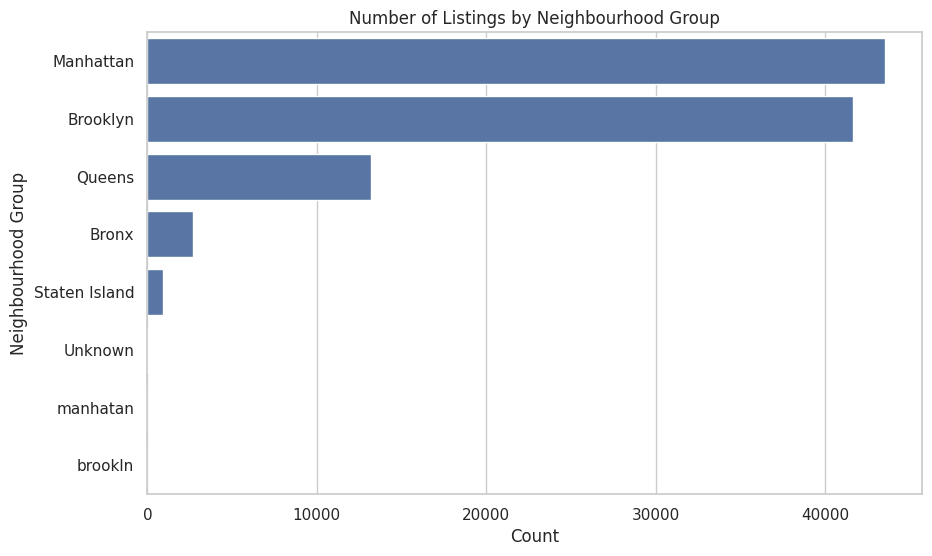

In [15]:
# Distribution by neighbourhood group
plt.figure(figsize=(10,6))
sns.countplot(y='neighbourhood group', data=df, order=df['neighbourhood group'].value_counts().index)
plt.title('Number of Listings by Neighbourhood Group')
plt.xlabel('Count')
plt.ylabel('Neighbourhood Group')
plt.show()

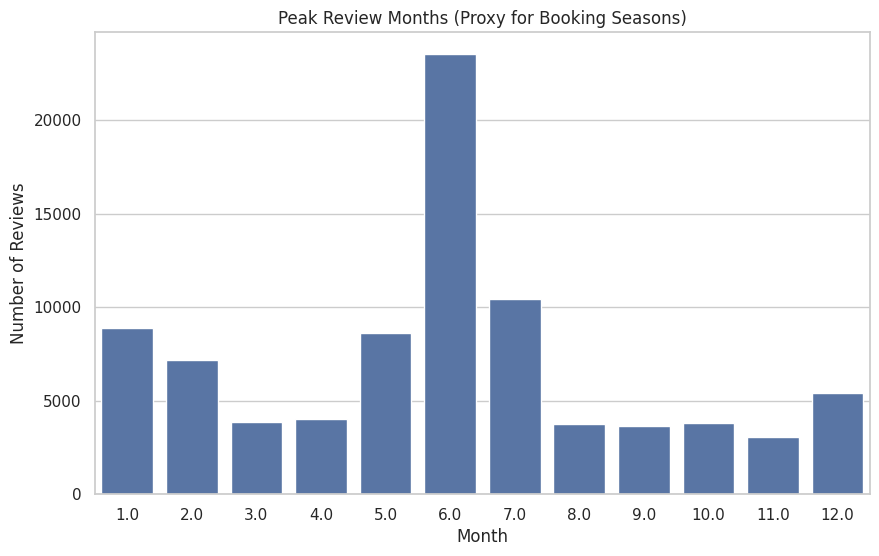

In [14]:
# Peak seasons: Extract month from 'last review'
df['review_month'] = df['last review'].dt.month
plt.figure(figsize=(10,6))
sns.countplot(x='review_month', data=df.dropna(subset=['last review']))
plt.title('Peak Review Months (Proxy for Booking Seasons)')
plt.xlabel('Month')
plt.ylabel('Number of Reviews')
plt.show()

/tmp/ipython-input-3412315007.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='room type', y='minimum nights', data=df, ci=None)


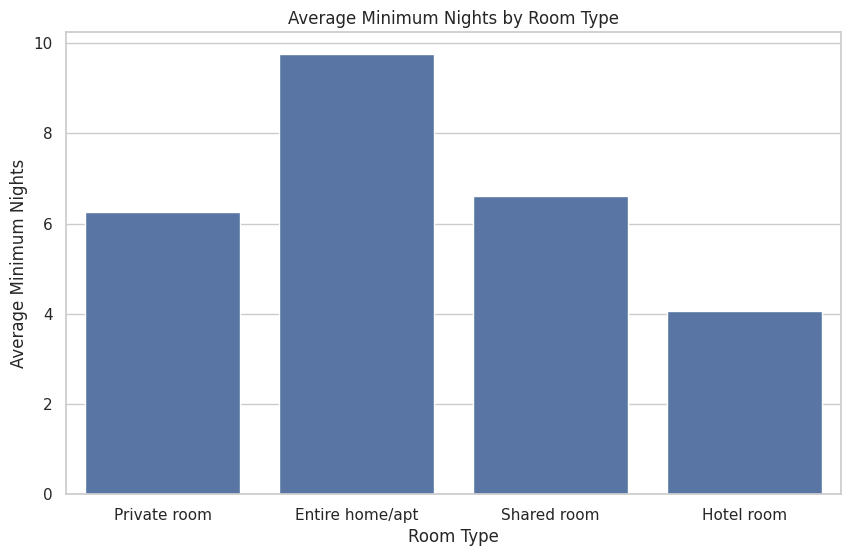

In [13]:

# Average minimum nights by room type
plt.figure(figsize=(10,6))
sns.barplot(x='room type', y='minimum nights', data=df, ci=None)
plt.title('Average Minimum Nights by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Average Minimum Nights')
plt.show()


### Insights on Booking Patterns:
- Most listings are in Brooklyn and Manhattan.
- Peak reviews (bookings) in summer months (June-August).
- Entire home/apts have longer minimum stays.

### 2. Pricing Strategies
- Price distribution.
- Price vs. neighbourhood.
- Price vs. review rate (satisfaction).
- Seasonality: Price by construction year or availability.


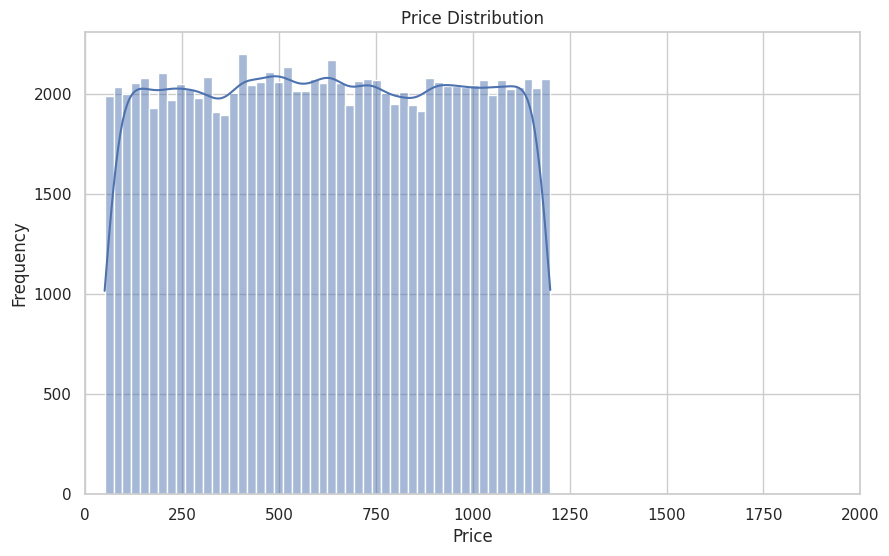

In [9]:
# Price distribution
plt.figure(figsize=(10,6))
sns.histplot(df['price'].dropna(), bins=50, kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.xlim(0, 2000)  # Limit for better view
plt.show()




/tmp/ipython-input-669384915.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(y='neighbourhood group', x='price', data=df, ci=None)


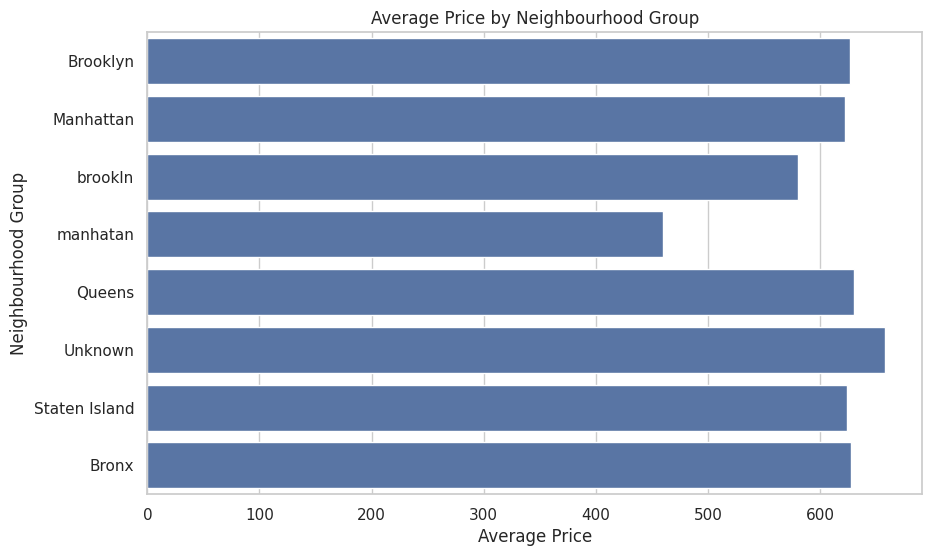

In [10]:
# Average price by neighbourhood group
plt.figure(figsize=(10,6))
sns.barplot(y='neighbourhood group', x='price', data=df, ci=None)
plt.title('Average Price by Neighbourhood Group')
plt.xlabel('Average Price')
plt.ylabel('Neighbourhood Group')
plt.show()

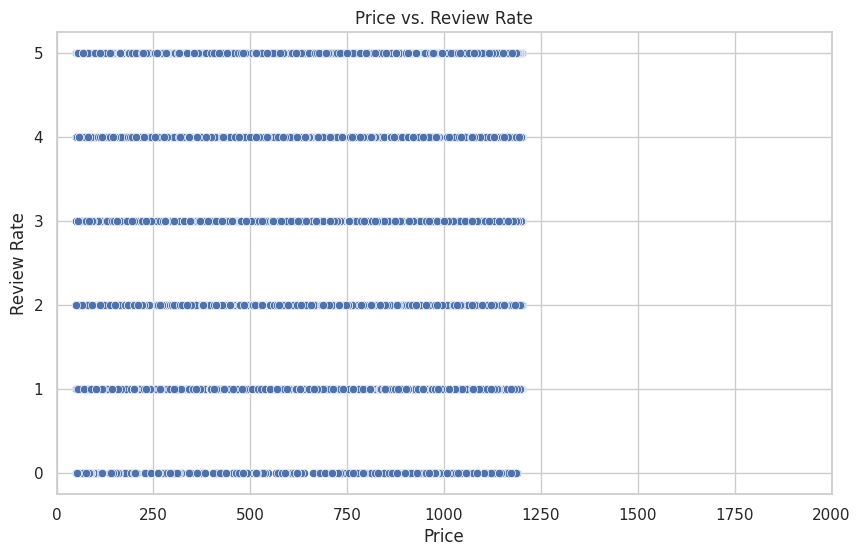

In [11]:
# Price vs. Review Rate
plt.figure(figsize=(10,6))
sns.scatterplot(x='price', y='review rate number', data=df)
plt.title('Price vs. Review Rate')
plt.xlabel('Price')
plt.ylabel('Review Rate')
plt.xlim(0, 2000)
plt.show()

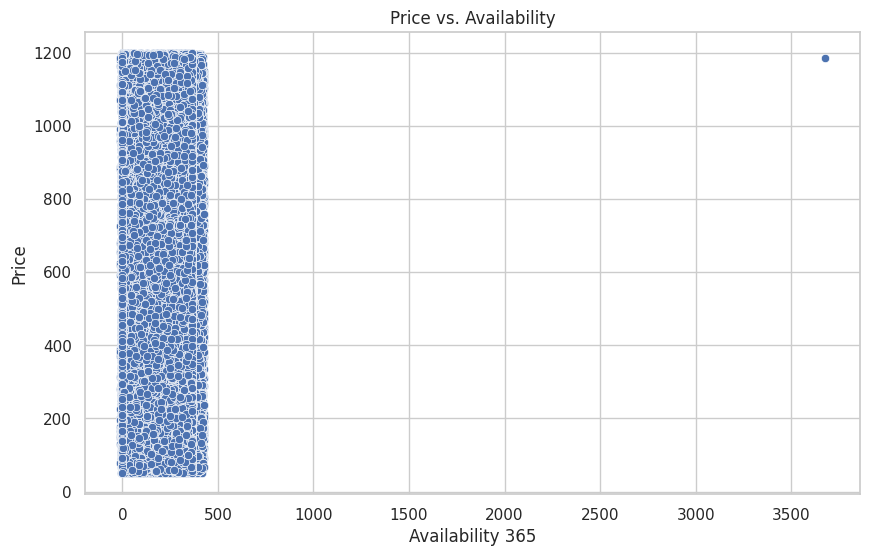

In [12]:
# Price vs. Availability
plt.figure(figsize=(10,6))
sns.scatterplot(x='availability 365', y='price', data=df)
plt.title('Price vs. Availability')
plt.xlabel('Availability 365')
plt.ylabel('Price')
plt.show()

### Insights on Pricing Strategies:
- Prices mostly under $1000, with peaks around $200-500.
- Higher prices in Manhattan.
- No strong correlation between price and review rate; mid-range prices have varied satisfaction.
- Higher availability often correlates with lower prices.

### 3. Guest Preferences
- Popular room types.
- Amenities via 'house_rules' text analysis (simple word count for common terms like 'no smoking', 'pets').
- Factors for higher ratings: Correlation with reviews per month, etc.


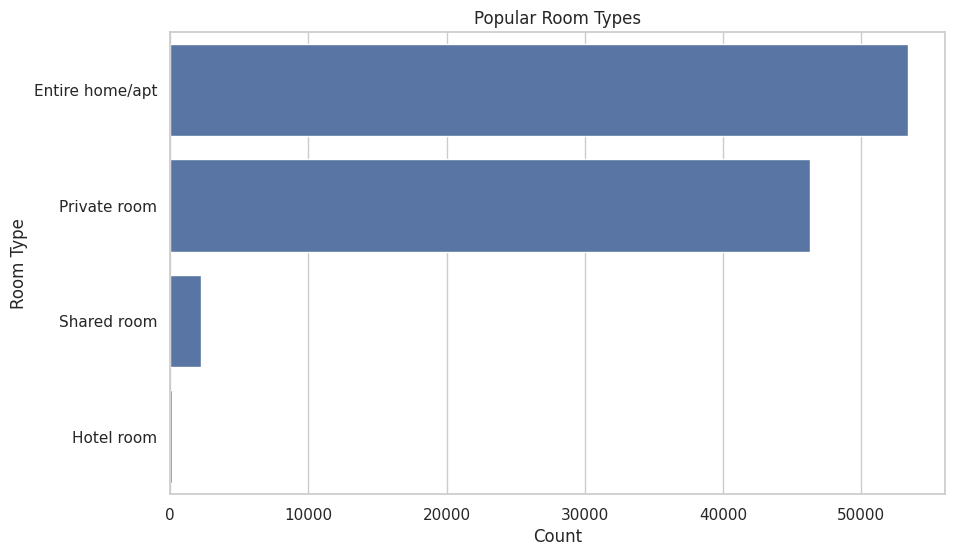

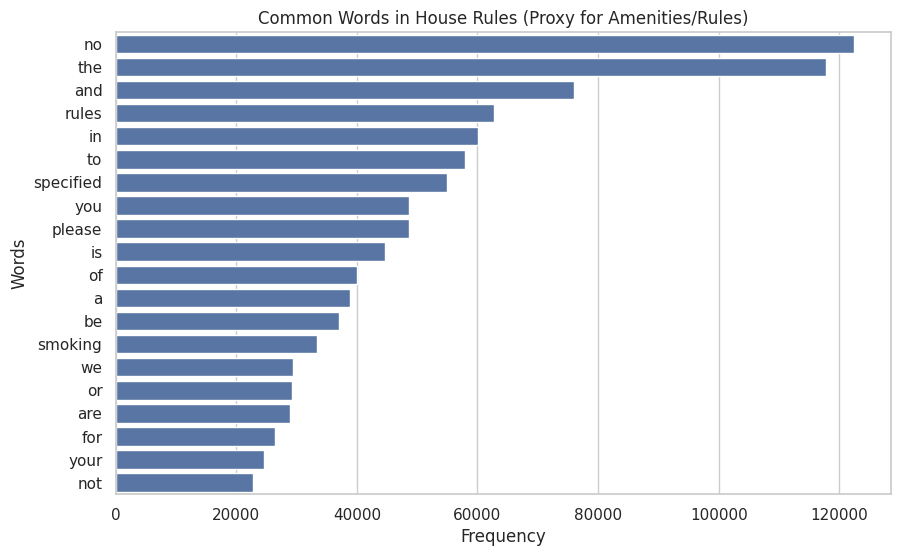

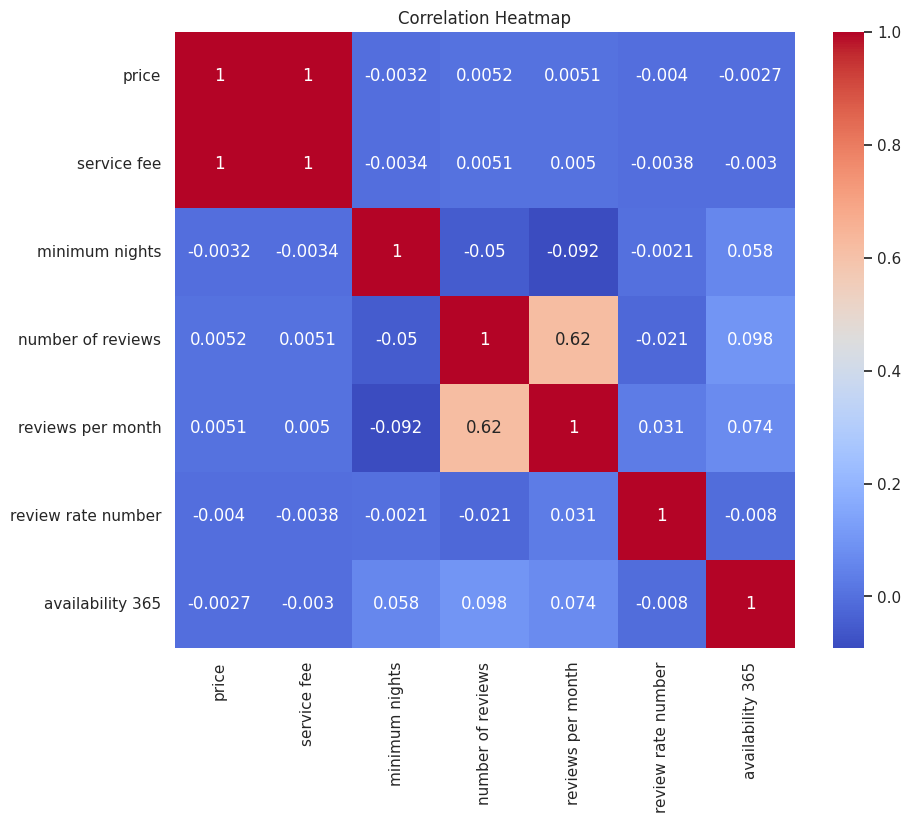

In [16]:
# Popular room types
plt.figure(figsize=(10,6))
sns.countplot(y='room type', data=df, order=df['room type'].value_counts().index)
plt.title('Popular Room Types')
plt.xlabel('Count')
plt.ylabel('Room Type')
plt.show()

# Simple amenities from house_rules (common words)
from collections import Counter
import re

house_rules_text = ' '.join(df['house_rules'].dropna().astype(str))
common_words = Counter(re.findall(r'\w+', house_rules_text.lower())).most_common(20)
words, counts = zip(*common_words)

plt.figure(figsize=(10,6))
sns.barplot(x=list(counts), y=list(words))
plt.title('Common Words in House Rules (Proxy for Amenities/Rules)')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()

# Factors for higher ratings: Correlation heatmap
corr_cols = ['price', 'service fee', 'minimum nights', 'number of reviews', 'reviews per month', 'review rate number', 'availability 365']
corr_matrix = df[corr_cols].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


### Insights on Guest Preferences:
- Private rooms and entire homes are most popular.
- Common rules: No smoking, no pets, quiet hours – guests prefer clear guidelines.
- Higher ratings correlate with more reviews per month; availability positively affects reviews.

### 4. Host Performance
- Verified vs. unverified hosts.
- Host listings count vs. reviews.
- Common complaints via house_rules or low ratings (assuming low 'review rate number' indicates issues).


/tmp/ipython-input-697921552.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='host_identity_verified', y='review rate number', data=df, ci=None)


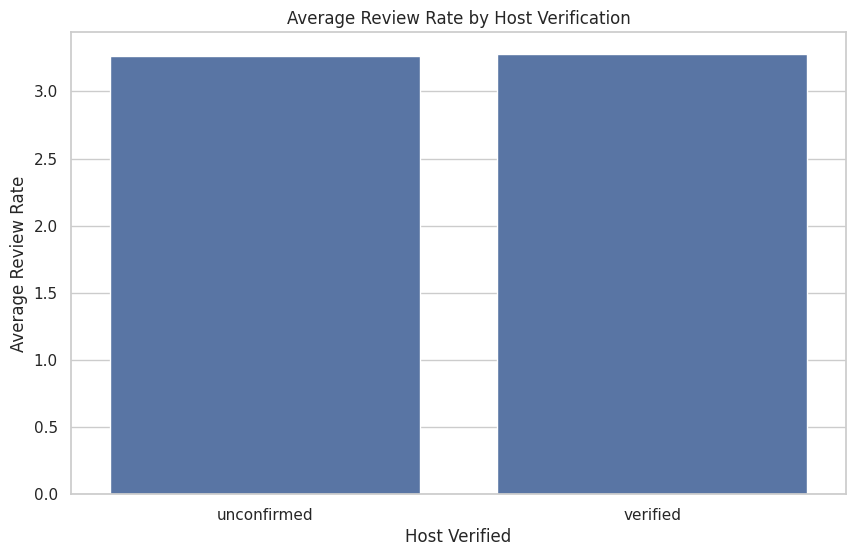

In [17]:
# Verified hosts performance
plt.figure(figsize=(10,6))
sns.barplot(x='host_identity_verified', y='review rate number', data=df, ci=None)
plt.title('Average Review Rate by Host Verification')
plt.xlabel('Host Verified')
plt.ylabel('Average Review Rate')
plt.show()



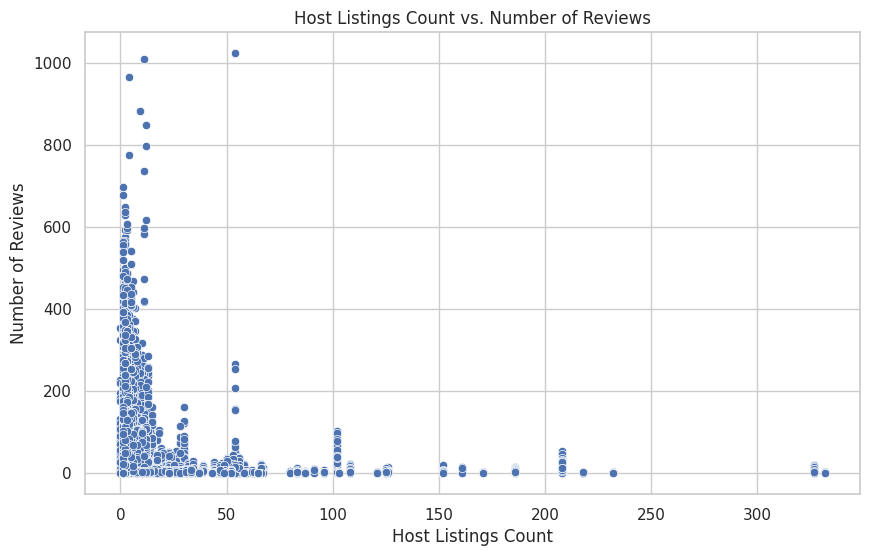

In [18]:
# Host listings vs. reviews
plt.figure(figsize=(10,6))
sns.scatterplot(x='calculated host listings count', y='number of reviews', data=df)
plt.title('Host Listings Count vs. Number of Reviews')
plt.xlabel('Host Listings Count')
plt.ylabel('Number of Reviews')
plt.show()


Number of low-rated listings: 32477


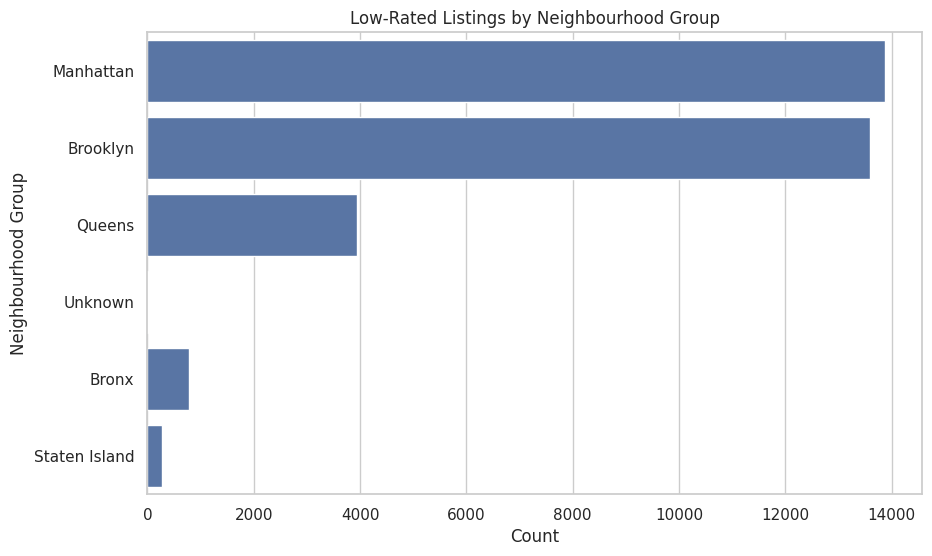

In [19]:
# Low rating analysis: Listings with low review rates
low_ratings = df[df['review rate number'] < 3]
print(f"Number of low-rated listings: {len(low_ratings)}")
# Example: Common neighbourhoods with low ratings
plt.figure(figsize=(10,6))
sns.countplot(y='neighbourhood group', data=low_ratings)
plt.title('Low-Rated Listings by Neighbourhood Group')
plt.xlabel('Count')
plt.ylabel('Neighbourhood Group')
plt.show()


### Insights on Host Performance:
- Verified hosts have slightly higher review rates.
- Hosts with more listings tend to have more reviews, indicating experience.
- Low ratings more common in certain areas; analyze house_rules for complaints like noise, cleanliness.

## Conclusions
- **Booking Patterns**: Focus on summer promotions in Brooklyn/Manhattan.
- **Pricing**: Mid-range pricing balances occupancy and satisfaction.
- **Preferences**: Emphasize no-smoking/pets rules; offer private spaces.
- **Hosts**: Verification and multiple listings improve performance.

This analysis provides actionable insights for hosts and Airbnb. Further ML models could predict prices or ratings.
